<a href="https://colab.research.google.com/github/Jacsjjacob/Flight-Delay-Preadiction/blob/main/Flight_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/flight_data_2018_to_2022.csv")
data.info()
data.describe()
data

/tmp/ipython-input-23-3663995287.py:5: DtypeWarning: Columns (11,13,78,85,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/flight_data_2018_to_2022.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563737 entries, 0 to 563736
Columns: 120 entries, Year to Unnamed: 119
dtypes: float64(72), int64(23), object(25)
memory usage: 516.1+ MB


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563732,2022,1,1,24,1,2022-01-24,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
563733,2022,1,1,24,1,2022-01-24,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
563734,2022,1,1,24,1,2022-01-24,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
563735,2022,1,1,24,1,2022-01-24,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563737 entries, 0 to 563736
Columns: 120 entries, Year to Unnamed: 119
dtypes: float64(72), int64(23), object(25)
memory usage: 516.1+ MB


In [ ]:
data.describe()


,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,DOT_ID_Operating_Airline,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 119
count,563737.0,563737.0,563737.0,563737.000000,563737.000000,563737.000000,563737.000000,17.0,17.000000,563737.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2022.0,1.0,1.0,15.963577,4.044444,19831.807753,2680.255515,20304.0,4131.294118,20001.203114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,8.982503,2.086369,271.869441,1803.194659,0.0,450.516060,376.353237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2022.0,1.0,1.0,1.000000,1.000000,19393.000000,1.000000,20304.0,3714.000000,19393.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022.0,1.0,1.0,8.000000,2.000000,19790.000000,1153.000000,20304.0,3855.000000,19790.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2022.0,1.0,1.0,16.000000,4.000000,19805.000000,2314.000000,20304.0,3975.000000,19977.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022.0,1.0,1.0,24.000000,6.000000,19977.000000,4187.000000,20304.0,4138.000000,20378.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2022.0,1.0,1.0,31.000000,7.000000,20436.000000,8816.000000,20304.0,5622.000000,20500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isna().sum()

,0
Year,0
Quarter,0
Month,0
DayofMonth,0
DayOfWeek,0
...,...
Div5LongestGTime,563737
Div5WheelsOff,563737
Div5TailNum,563737
Duplicate,0


# Pre Processing

In [ ]:
columns_to_keep = [
    "Year",
    "Month",
    "DayofMonth",
    "DayOfWeek",               # Corrected casing (DayofWeek ➝ DayOfWeek)
    "FlightDate",
    "Operating_Airline ",       # Likely correct name instead of "Operating airline"
    "Tail_Number",                # Common version instead of "Tail number"
    "Flight_Number_Operating_Airline",  # Possibly correct column name for "Flight no Operating airline"
    "OriginAirportID",         # "Origin airport id"
    "Origin",                  # Origin code like 'ATL'
    "OriginCityName",          # "Origin city name"
    "DestAirportID",           # "Dest airport id"
    "Dest",                    # Destination code
    "DestCityName",            # Destination city name
    "DepTime",                 # Departure time
    "DepDelay",                # Delay in departure (mins)
    "DepDelayMinutes",         # Might be called this instead of "DepDelay Min"
    "DepDel15",                # Whether delay > 15 mins
    "ArrTime",                 # Arrival time
    "ArrDelay",                # Arrival delay
    "ArrDelayMinutes",         # Might be called this instead of "ArrDelay Min"
    "ArrDel15"                 # Whether arrival delay > 15 mins
]

existing_columns = [col for col in columns_to_keep if col in data.columns]

data = data[existing_columns]
data.to_csv("flight_delay_clean.csv", index=False)
data.head(20)

NameError: name 'data' is not defined

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563737 entries, 0 to 563736
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Year                             563737 non-null  int64  
 1   Month                            563737 non-null  int64  
 2   DayofMonth                       563737 non-null  int64  
 3   DayOfWeek                        563737 non-null  int64  
 4   FlightDate                       563737 non-null  object 
 5   Operating_Airline                563737 non-null  object 
 6   Tail_Number                      553169 non-null  object 
 7   Flight_Number_Operating_Airline  563737 non-null  int64  
 8   OriginAirportID                  563737 non-null  int64  
 9   Origin                           563737 non-null  object 
 10  OriginCityName                   563737 non-null  object 
 11  DestAirportID                    563737 non-null  int64  
 12  De

In [ ]:
data.isna().sum()

,0
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
FlightDate,0
Operating_Airline,0
Tail_Number,10568
Flight_Number_Operating_Airline,0
OriginAirportID,0
Origin,0


In [ ]:
data.nunique()


,0
Year,1
Month,1
DayofMonth,31
DayOfWeek,7
FlightDate,31
Operating_Airline,21
Tail_Number,5582
Flight_Number_Operating_Airline,6378
OriginAirportID,369
Origin,369


In [ ]:
db=data.copy()
db.drop(columns=['FlightDate','Year','Month','Flight_Number_Operating_Airline',
                   'OriginAirportID','OriginCityName','DestAirportID','DestCityName',
                   'DepDelay','DepDelayMinutes','DepDel15','ArrTime','ArrDelay','ArrDelayMinutes',], inplace=True)


In [ ]:
db

,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Origin,Dest,DepTime,ArrDel15
0,6,4,DL,N315DN,FLL,LGA,NaN,NaN
1,6,4,DL,N545US,ATL,FLL,1627.0,0.0
2,6,4,DL,N545US,FLL,ATL,1929.0,0.0
3,6,4,DL,N345NB,FLL,RDU,1019.0,0.0
4,6,4,DL,N978AT,ATL,JAN,1113.0,0.0
...,...,...,...,...,...,...,...,...
563732,24,1,YV,NaN,IAH,OKC,NaN,NaN
563733,24,1,YV,NaN,OKC,IAH,NaN,NaN
563734,24,1,YV,NaN,ATL,IAD,NaN,NaN
563735,24,1,YV,NaN,IAD,ATL,NaN,NaN


In [ ]:
db.nunique()

,0
DayofMonth,31
DayOfWeek,7
Operating_Airline,21
Tail_Number,5582
Origin,369
Dest,369
DepTime,1422
ArrDel15,2


In [ ]:
db.duplicated().sum()

np.int64(2537)

In [ ]:
db.isna().sum()

,0
DayofMonth,0
DayOfWeek,0
Operating_Airline,0
Tail_Number,10568
Origin,0
Dest,0
DepTime,35274
ArrDel15,36843


In [ ]:
db = db.dropna(subset=['DepTime', 'ArrDel15'])

In [ ]:
db.duplicated().sum()

np.int64(0)

In [ ]:
db.isna().sum()

,0
DayofMonth,0
DayOfWeek,0
Operating_Airline,0
Tail_Number,0
Origin,0
Dest,0
DepTime,0
ArrDel15,0


In [ ]:
db

,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Origin,Dest,DepTime,ArrDel15
1,6,4,DL,N545US,ATL,FLL,1627.0,0.0
2,6,4,DL,N545US,FLL,ATL,1929.0,0.0
3,6,4,DL,N345NB,FLL,RDU,1019.0,0.0
4,6,4,DL,N978AT,ATL,JAN,1113.0,0.0
5,6,4,DL,N978AT,JAN,ATL,1230.0,0.0
...,...,...,...,...,...,...,...,...
563581,3,1,YV,N957LR,CID,DFW,1742.0,1.0
563582,1,6,YV,N958LR,DFW,MOB,1738.0,0.0
563583,2,7,YV,N919FJ,DFW,MOB,1845.0,1.0
563585,1,6,YV,N958LR,MOB,DFW,1949.0,0.0


In [ ]:
columns_to_save = ['Operating_Airline ', 'Tail_Number', 'Origin', 'Dest']
with open('unique_values.txt', 'w') as f:
    for col in columns_to_save:
        f.write(f"--- Unique values in '{col}' ({db[col].nunique()} total) ---\n")
        unique_vals = db[col].unique()
        for val in unique_vals:
            f.write(f"{val}\n")
        f.write("\n\n")

print("✅ unique_values.txt has been created.")

✅ unique_values.txt has been created.


In [ ]:
db.nunique()

,0
DayofMonth,31
DayOfWeek,7
Operating_Airline,21
Tail_Number,5576
Origin,369
Dest,369
DepTime,1422
ArrDel15,2


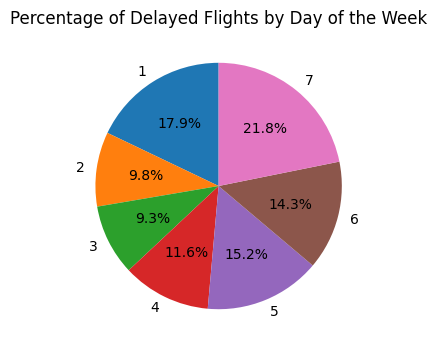

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

week = db.groupby('DayOfWeek')['ArrDel15'].sum().reset_index()

plt.figure(figsize=(6, 4))
plt.pie(week['ArrDel15'], labels=week['DayOfWeek'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Delayed Flights by Day of the Week')
plt.show()

In [ ]:
db['IsWeekend'] = db['DayOfWeek'].apply(lambda x: 1 if x in [1, 7] else 0)
db.drop('DayOfWeek', axis=1, inplace=True)


/tmp/ipython-input-44-2823823339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['IsWeekend'] = db['DayOfWeek'].apply(lambda x: 1 if x in [1, 7] else 0)
/tmp/ipython-input-44-2823823339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.drop('DayOfWeek', axis=1, inplace=True)


In [ ]:
db.nunique(0)

,0
DayofMonth,31
Operating_Airline,21
Tail_Number,5576
Origin,369
Dest,369
DepTime,1422
ArrDel15,2
IsWeekend,2


In [ ]:
db

,DayofMonth,Operating_Airline,Tail_Number,Origin,Dest,DepTime,ArrDel15,IsWeekend
1,6,DL,N545US,ATL,FLL,1627.0,0.0,0
2,6,DL,N545US,FLL,ATL,1929.0,0.0,0
3,6,DL,N345NB,FLL,RDU,1019.0,0.0,0
4,6,DL,N978AT,ATL,JAN,1113.0,0.0,0
5,6,DL,N978AT,JAN,ATL,1230.0,0.0,0
...,...,...,...,...,...,...,...,...
563581,3,YV,N957LR,CID,DFW,1742.0,1.0,1
563582,1,YV,N958LR,DFW,MOB,1738.0,0.0,0
563583,2,YV,N919FJ,DFW,MOB,1845.0,1.0,1
563585,1,YV,N958LR,MOB,DFW,1949.0,0.0,0


In [ ]:
db.columns = db.columns.str.strip()
db['Operating_Airline']


,Operating_Airline
1,DL
2,DL
3,DL
4,DL
5,DL
...,...
563581,YV
563582,YV
563583,YV
563585,YV


In [ ]:
db['ArrDel15']

,ArrDel15
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
563581,1.0
563582,0.0
563583,1.0
563585,0.0


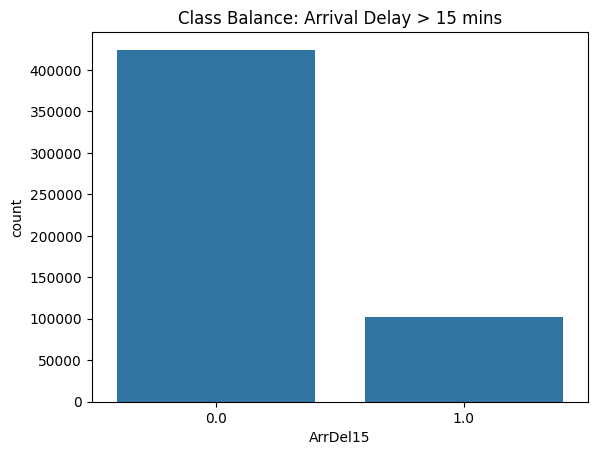

In [ ]:
sns.countplot(x='ArrDel15', data=db)
plt.title('Class Balance: Arrival Delay > 15 mins')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in ['Operating_Airline', 'Tail_Number', 'Origin', 'Dest']:
    db[col] = LabelEncoder().fit_transform(db[col])

/tmp/ipython-input-50-2762576472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db[col] = LabelEncoder().fit_transform(db[col])
/tmp/ipython-input-50-2762576472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db[col] = LabelEncoder().fit_transform(db[col])
/tmp/ipython-input-50-2762576472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
db

,DayofMonth,Operating_Airline,Tail_Number,Origin,Dest,DepTime,ArrDel15,IsWeekend
1,6,5,2570,22,127,1627.0,0.0,0
2,6,5,2570,127,22,1929.0,0.0,0
3,6,5,1501,127,290,1019.0,0.0,0
4,6,5,5482,22,179,1113.0,0.0,0
5,6,5,5482,179,22,1230.0,0.0,0
...,...,...,...,...,...,...,...,...
563581,3,18,5380,68,96,1742.0,1.0,1
563582,1,18,5386,96,231,1738.0,0.0,0
563583,2,18,5076,96,231,1845.0,1.0,1
563585,1,18,5386,231,96,1949.0,0.0,0


In [ ]:
db['DepHour'] = (db['DepTime'] // 100).astype(int)
db.drop(columns=['DepTime'], inplace=True)

/tmp/ipython-input-52-956334179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['DepHour'] = (db['DepTime'] // 100).astype(int)
/tmp/ipython-input-52-956334179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.drop(columns=['DepTime'], inplace=True)


In [ ]:
db

,DayofMonth,Operating_Airline,Tail_Number,Origin,Dest,ArrDel15,IsWeekend,DepHour
1,6,5,2570,22,127,0.0,0,16
2,6,5,2570,127,22,0.0,0,19
3,6,5,1501,127,290,0.0,0,10
4,6,5,5482,22,179,0.0,0,11
5,6,5,5482,179,22,0.0,0,12
...,...,...,...,...,...,...,...,...
563581,3,18,5380,68,96,1.0,1,17
563582,1,18,5386,96,231,0.0,0,17
563583,2,18,5076,96,231,1.0,1,18
563585,1,18,5386,231,96,0.0,0,19


In [ ]:
num_cols = ['DepHour', 'DayofMonth']
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sd =StandardScaler()
db_scaled = db.copy()
db_scaled[num_cols] = sd.fit_transform(db[num_cols])
db_scaled

,DayofMonth,Operating_Airline,Tail_Number,Origin,Dest,ArrDel15,IsWeekend,DepHour
1,-1.147955,5,2570,22,127,0.0,0,0.603565
2,-1.147955,5,2570,127,22,0.0,0,1.212193
3,-1.147955,5,1501,127,290,0.0,0,-0.613691
4,-1.147955,5,5482,22,179,0.0,0,-0.410815
5,-1.147955,5,5482,179,22,0.0,0,-0.207939
...,...,...,...,...,...,...,...,...
563581,-1.485905,18,5380,68,96,1.0,1,0.806441
563582,-1.711205,18,5386,96,231,0.0,0,0.806441
563583,-1.598555,18,5076,96,231,1.0,1,1.009317
563585,-1.711205,18,5386,231,96,0.0,0,1.212193


# Classification Algorithms

In [ ]:
from sklearn.model_selection import train_test_split
y=db_scaled['ArrDel15']
x=db_scaled.drop(columns=['ArrDel15'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(421515, 7) (105379, 7) (421515,) (105379,)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr = LogisticRegression()
lr_model=lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

print(accuracy_score(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))

0.810654874310821
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89     85151
         1.0       0.71      0.02      0.04     20228

    accuracy                           0.81    105379
   macro avg       0.76      0.51      0.47    105379
weighted avg       0.79      0.81      0.73    105379

[[84968   183]
 [19770   458]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



**K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
metric_k=[]
for k in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn_model=knn.fit(x_train,y_train)
  knn_pred=knn_model.predict(x_test)
  metric_k.append(accuracy_score(y_test,knn_pred))
metric_k

[0.7149621841163799,
 0.7891230700613975,
 0.7576177416752864,
 0.7948642518907941,
 0.7797948357832206,
 0.7988593552795149,
 0.7901859004165915,
 0.8014215356000721,
 0.7965059452072993,
 0.8032530200514334,
 0.7998272900672809,
 0.8046859431195968,
 0.8023325330473814,
 0.8055400032264493,
 0.8041545279419998,
 0.8062612095389025,
 0.8048947133679386,
 0.8065174275709581,
 0.8054261285455356]

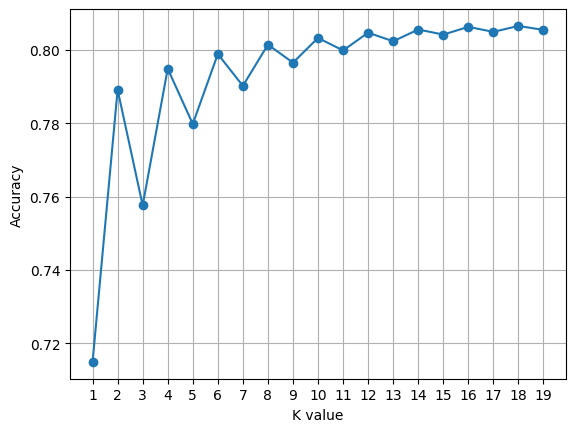

In [ ]:
plt.plot(range(1,20),metric_k,marker="o")
plt.grid()
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.xticks(range(1,20))
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn_model=knn.fit(x_train,y_train)
knn_pred=knn_model.predict(x_test)

In [ ]:
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.7149621841163799
[[70565 14586]
 [15451  4777]]
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82     85151
         1.0       0.25      0.24      0.24     20228

    accuracy                           0.71    105379
   macro avg       0.53      0.53      0.53    105379
weighted avg       0.71      0.71      0.71    105379



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     85151
         1.0       0.67      0.26      0.37     20228

    accuracy                           0.83    105379
   macro avg       0.76      0.61      0.64    105379
weighted avg       0.81      0.83      0.80    105379



**XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=(len(y_train)-sum(y_train)) / sum(y_train))  # handle imbalance
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

print(classification_report(y_test, xgb_pred))


              precision    recall  f1-score   support

         0.0       0.90      0.74      0.82     85151
         1.0       0.38      0.67      0.49     20228

    accuracy                           0.73    105379
   macro avg       0.64      0.71      0.65    105379
weighted avg       0.80      0.73      0.75    105379



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_pred= dt_model.predict(x_test)

print(accuracy_score(y_test,dt_pred))
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

0.7574943774376299
[[71631 13520]
 [12035  8193]]
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85     85151
         1.0       0.38      0.41      0.39     20228

    accuracy                           0.76    105379
   macro avg       0.62      0.62      0.62    105379
weighted avg       0.76      0.76      0.76    105379



**BEST PERFORMING ALGORITHM  :  Random Forest**


#  Hyper Parameter Tuning

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)

# Step 2: Train the LGBM model
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm.fit(x_res, y_res)

# Step 3: Predict probabilities and apply threshold tuning
probs = lgbm.predict_proba(x_test)[:, 1]
custom_pred = (probs > 0.35).astype(int)

# Step 4: Evaluate
print("Custom Threshold Evaluation Report (Threshold = 0.35):")
print(classification_report(y_test, custom_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, custom_pred))
print("Accuracy:", accuracy_score(y_test, custom_pred))


[LightGBM] [Info] Number of positive: 339228, number of negative: 339228
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1268
[LightGBM] [Info] Number of data points in the train set: 678456, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Custom Threshold Evaluation Report (Threshold = 0.35):
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     85151
         1.0       0.49      0.40      0.44     20228

    accuracy                           0.80    105379
   macro avg       0.68      0.65      0.66    105379
weighted avg       0.79      0.80      0.80    105379

Confusion Matrix:
 [[76783  8368]
 [12196  8032]]
Accuracy: 0.8048567551409673


In [ ]:
from sklearn.metrics import classification_report

thresholds = [0.25, 0.30, 0.35, 0.40, 0.45]

for t in thresholds:
    custom_pred = (probs > t).astype(int)
    print(f"\n--- Threshold: {t} ---")
    print(classification_report(y_test, custom_pred))



--- Threshold: 0.25 ---
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83     85151
         1.0       0.38      0.59      0.46     20228

    accuracy                           0.74    105379
   macro avg       0.64      0.68      0.65    105379
weighted avg       0.79      0.74      0.76    105379


--- Threshold: 0.3 ---
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     85151
         1.0       0.44      0.48      0.46     20228

    accuracy                           0.78    105379
   macro avg       0.66      0.67      0.66    105379
weighted avg       0.79      0.78      0.79    105379


--- Threshold: 0.35 ---
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     85151
         1.0       0.49      0.40      0.44     20228

    accuracy                           0.80    105379
   macro avg       0.68      0.65      0.66    105379


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Resample
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(x_res, y_res)

# Predict and threshold
probs = rf.predict_proba(x_test)[:, 1]
custom_pred = (probs > 0.35).astype(int)

# Evaluate
print(classification_report(y_test, custom_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, custom_pred))
print("Accuracy:", accuracy_score(y_test, custom_pred))


              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     85151
         1.0       0.46      0.53      0.50     20228

    accuracy                           0.79    105379
   macro avg       0.67      0.69      0.68    105379
weighted avg       0.80      0.79      0.80    105379

Confusion Matrix:
 [[72694 12457]
 [ 9465 10763]]
Accuracy: 0.7919699370842388


# New Data Prediction

In [ ]:
db_scaled

,DayofMonth,Operating_Airline,Tail_Number,Origin,Dest,ArrDel15,IsWeekend,DepHour
1,-1.147955,5,2570,22,127,0.0,0,0.603565
2,-1.147955,5,2570,127,22,0.0,0,1.212193
3,-1.147955,5,1501,127,290,0.0,0,-0.613691
4,-1.147955,5,5482,22,179,0.0,0,-0.410815
5,-1.147955,5,5482,179,22,0.0,0,-0.207939
...,...,...,...,...,...,...,...,...
563581,-1.485905,18,5380,68,96,1.0,1,0.806441
563582,-1.711205,18,5386,96,231,0.0,0,0.806441
563583,-1.598555,18,5076,96,231,1.0,1,1.009317
563585,-1.711205,18,5386,231,96,0.0,0,1.212193


In [ ]:

new_data = pd.DataFrame([{
  "DayofMonth": 2,
  "DayOfWeek": 7,
  "Operating_Airline": "YV",
  "Tail_Number": "N919FJ",
  "Origin": "DFW",
  "Dest": "MOB",
  "DepTime": 1845.0,
  "IsWeekend": 1
}])

In [ ]:
new_data_scaled = new_data.copy()
new_data_scaled[['DepHour', 'DayofMonth']] = sd.transform(
    new_data[['DepHour', 'DayofMonth']]
)

In [ ]:
prediction = xgb.predict(new_data_scaled)
print("Predicted Flight Delay:", "Delayed" if prediction[0] == 1 else "Not Delayed")

Predicted Flight Delay: Delayed


In [ ]:
prob = lr.predict_proba(new_data_scaled)
print("Probability of delay:", prob[0][1])

Probability of delay: 0.5126260691573572
